In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
from plot_function import *
%matplotlib inline

results = pd.read_csv('survey-results-public.csv')
schema = pd.read_csv('survey-results-schema.csv')
schema.head()

,Column,Question
0,Respondent,Respondent ID number
1,Professional,Which of the following best describes you?
2,ProgramHobby,Do you program as a hobby or contribute to ope...
3,Country,In which country do you currently live?
4,University,"Are you currently enrolled in a formal, degree..."


First thing I needed to do is to get the count of all responses from each column in the dataset.

In [2]:
column_counts = list(results.count())

[51392,
 51392,
 51392,
 51392,
 51392,
 51392,
 51392,
 42841,
 44008,
 38922,
 38823,
 51145,
 40890,
 974,
 36125,
 10696,
 1553,
 4890,
 42695,
 40376,
 923,
 921,
 923,
 917,
 928,
 935,
 922,
 930,
 51008,
 31293,
 31234,
 31304,
 31184,
 31240,
 30903,
 31021,
 31057,
 30984,
 31047,
 31014,
 30886,
 30965,
 30702,
 30971,
 30810,
 30935,
 33380,
 20600,
 32710,
 22130,
 22147,
 22136,
 22123,
 22189,
 22183,
 22146,
 22004,
 21973,
 22020,
 21986,
 21998,
 21978,
 21997,
 22023,
 30235,
 42046,
 24719,
 22461,
 23737,
 28642,
 28694,
 28639,
 28596,
 28617,
 28553,
 28553,
 28663,
 28618,
 28545,
 21408,
 13387,
 38851,
 23355,
 30354,
 26735,
 2602,
 23568,
 36696,
 36625,
 33771,
 20229,
 23331,
 29452,
 25109,
 29114,
 27884,
 35830,
 36457,
 25771,
 30730,
 29561,
 29641,
 29619,
 29399,
 29765,
 29350,
 29640,
 29457,
 25472,
 29725,
 29727,
 29736,
 29671,
 29689,
 29691,
 21658,
 21659,
 21584,
 21601,
 21593,
 21613,
 21616,
 21595,
 21545,
 21586,
 21578,
 36932,
 3659

Now I need to check the length of, and the number of responses for, each question. Then I group the question by its length with others in that bucket (50 for this case).
Each bucket will be averaged later.

In [3]:
bucket_size = 50
responses_by_question_length = {}
for column_index, column in enumerate(results.columns):
    if column == "Respondent":
        continue
    question_schema = schema.loc[schema['Column'] == column]
    question_string = list(question_schema['Question'])[0]
    number_of_responses = column_counts[column_index]
    length_bucket = np.floor(len(question_string)/bucket_size)*bucket_size
    responses_by_question_length.setdefault(length_bucket, []).append(number_of_responses)

Now that I have all the response counts in their appropriate buckets, I can average out each of the lists. For the buckets in between, I'm giving them an average of 0.

In [4]:
grouped_averages = {}
for group in range(0, round(max(*list(responses_by_question_length.keys())))+bucket_size, bucket_size):
    if responses_by_question_length.get(group):
        average = sum(responses_by_question_length[group])/len(responses_by_question_length[group])
    else:
        average = 0
    grouped_averages.setdefault(group, average)

Next I'll draw the bar graph using the buckets as the categories (e.g "0-50", "50-100").

C:\Users\killa\Documents\udacity ds nanodegree\project1\plot_function.py:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_tickets, rotation=45)


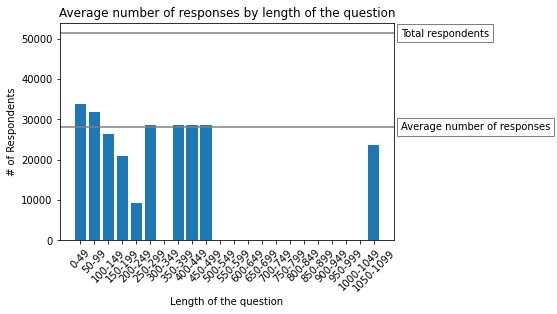

In [6]:
groups = ["%s-%s" % (key, key + bucket_size-1) for key in grouped_averages.keys()]
plot_response_graph(
    grouped_averages, sum(column_counts)/len(column_counts), results.shape[0],
    x_tickets=groups,
    title="Average number of responses by length of the question",
    x_label="Length of the question"
)